In [2]:
#1) dataset 불러오기
import pandas as pd
import numpy as np

#url로 raw data 불러오기
raw_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv" 

#컬럼명이 없는 파일이라 컬럼명 지정해주기
column_names = ['n_Pregnancies', 'Glucose_Concentration', 'Blood_Pressure(mmHg)', 'Skin_Thickness(mm)',
                'Serum_Insulin(mu_U/ml)', 'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome']

#raw_data 파일을 컬럼명과 함께 csv로 불러오기
df = pd.read_csv(raw_data, names=column_names)
#raw_data.csv로 저장
df.to_csv("raw_data(2025.11.20).csv", index=False)
#저장한 원본 데이터 확인
print("원본 데이터:", df.shape)
print(df.head())

원본 데이터: (768, 9)
   n_Pregnancies  Glucose_Concentration  Blood_Pressure(mmHg)  \
0              6                    148                    72   
1              1                     85                    66   
2              8                    183                    64   
3              1                     89                    66   
4              0                    137                    40   

   Skin_Thickness(mm)  Serum_Insulin(mu_U/ml)   BMI  \
0                  35                       0  33.6   
1                  29                       0  26.6   
2                   0                       0  23.3   
3                  23                      94  28.1   
4                  35                     168  43.1   

   Diabetes_Pedigree_Function  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288  

In [3]:
#기술 통계 확인
df.describe()

,n_Pregnancies,Glucose_Concentration,Blood_Pressure(mmHg),Skin_Thickness(mm),Serum_Insulin(mu_U/ml),BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#2) 0이 결측치로 여겨지는 컬럼 지정 (n_Pregnancies, Diabetes_Pedigree_Function, Age는 0 가능)
zero_invalid_cols = [
    'Glucose_Concentration',
    'Blood_Pressure(mmHg)',
    'Skin_Thickness(mm)',
    'Serum_Insulin(mu_U/ml)',
    'BMI'
]

In [5]:
# 3-1) 방법 1: 0값 포함된 행 전체 제거

df_drop = df.copy()
#0이 아닌 행들만 모아서 df_drop에 할당
df_drop = df_drop[(df_drop[zero_invalid_cols] != 0).all(axis=1)]

#0을 제거한 데이터프레임 csv로 저장
df_drop.to_csv("diabetes_dropna.csv", index=False)
print("dropna 저장 완료:", df_drop.shape)

dropna 저장 완료: (392, 9)


In [6]:
display(df_drop)

,n_Pregnancies,Glucose_Concentration,Blood_Pressure(mmHg),Skin_Thickness(mm),Serum_Insulin(mu_U/ml),BMI,Diabetes_Pedigree_Function,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [7]:
# 3-2) 방법 2: median 기반 치환
df_median = df.copy() #copy 만들어놓기

for col in zero_invalid_cols:
    median_val = df_median.loc[df_median[col] != 0, col].median()
    df_median.loc[df_median[col] == 0, col] = median_val

df_median.to_csv("diabetes_median.csv", index=False)
print("median 저장 완료:", df_median.shape)

median 저장 완료: (768, 9)


In [8]:
# 3-3) 방법 3: mean 기반 치환
df_mean = df.copy()
df_mean[zero_invalid_cols] = df_mean[zero_invalid_cols].astype(float)

for col in zero_invalid_cols:
    mean_val = df_mean.loc[df_mean[col] != 0, col].mean()
    df_mean.loc[df_mean[col] == 0, col] = mean_val

df_mean.to_csv("diabetes_mean.csv", index=False)
print("mean 저장 완료:", df_mean.shape)

mean 저장 완료: (768, 9)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

#데이터셋 불러오기
df_drop = pd.read_csv("diabetes_dropna.csv")
df_median = pd.read_csv("diabetes_median.csv")
df_mean = pd.read_csv("diabetes_mean.csv")

#train set, test set으로 분리
def split_dataset(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Outcome'])
    Y = df['Outcome']

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state, stratify=Y
    )
    return X_train, X_test, Y_train, Y_test

#각각 train set과 test set으로 분리한 데이터들 csv 파일로 저장
# ---- 1) DROPNA ----
X_train_drop, X_test_drop, Y_train_drop, Y_test_drop = split_dataset(df_drop)

X_train_drop.to_csv("dropna_train_20251120.csv", index=False)
X_test_drop.to_csv("dropna_test_20251120.csv", index=False)
Y_train_drop.to_csv("dropna_ytrain_20251120.csv", index=False)
Y_test_drop.to_csv("dropna_ytest_20251120.csv", index=False)


# ---- 2) MEDIAN ----
X_train_med, X_test_med, Y_train_med, Y_test_med = split_dataset(df_median)

X_train_med.to_csv("median_train_20251120.csv", index=False)
X_test_med.to_csv("median_test_20251120.csv", index=False)
Y_train_med.to_csv("median_ytrain_20251120.csv", index=False)
Y_test_med.to_csv("median_ytest_20251120.csv", index=False)


# ---- 3) MEAN ----
X_train_mean, X_test_mean, Y_train_mean, Y_test_mean = split_dataset(df_mean)

X_train_mean.to_csv("mean_train_20251120.csv", index=False)
X_test_mean.to_csv("mean_test_20251120.csv", index=False)
Y_train_mean.to_csv("mean_ytrain_20251120.csv", index=False)
Y_test_mean.to_csv("mean_ytest_20251120.csv", index=False)


print("✔ 모든 파일 저장 완료!")


✔ 모든 파일 저장 완료!


In [10]:
#KNN(classifier) 모델 학습 및 평가 - default k = 5
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "median", "mean"] 

results_knn = []

for name in datasets:
    print(f"\n=== KNN 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # 4) KNN 모델 생성 (default k=5)
    kn = KNeighborsClassifier(n_neighbors=5)
    kn.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {kn.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {kn.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = kn.predict(X_test_scaled) #근처 이웃을 보고 다수결로 클래스 판단 (1 or 0)
    proba = kn.predict_proba(X_test_scaled)[:, 1] #시그모이드(이진분류) 함수를 이용해 예측확률 구하기

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred) #정확도, 이산적 분류 결과 필요(pred)(당뇨병 진단은 이진분류이기때문에 accuracy는 속일 수 있음)
    f1 = f1_score(y_test, pred) #정밀도(예측한 것 중 맞는 비율)와 재현율(당뇨병 중 모델이 맞게 예측한 비율)의 조화 평균, 1에 가까울수록 완벽, 이산적 분류 결과 필요(pred)
    auc = roc_auc_score(y_test, proba) #모델이 당뇨병과 정상을 구분하는 능력을 수치화한 지표(민감도와 1-특이도를 시각화), 1에 가까울수록 완벽, 연속적 확률값 필요

    results_knn.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "KNN AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, KNN AUC: {auc:.3f}")

# 결과 표 출력
print("\n=== KNN 모델 평가 결과 (k=5, default) ===")
results_knn_df = pd.DataFrame(results_knn)
print(results_knn_df)   

# 의료 데이터 기준, ROC-AUC > F1-score > Accuracy 순으로 중요하게 생각


=== KNN 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.8242811501597445
[dropna] 테스트세트의 성능은 0.759493670886076
[dropna] Accuracy: 0.759, F1 Score: 0.596, KNN AUC: 0.815

=== KNN 모델 학습 및 평가: median 데이터셋 ===
[median] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[median] 훈련세트의 성능은 0.8208469055374593
[median] 테스트세트의 성능은 0.7532467532467533
[median] Accuracy: 0.753, F1 Score: 0.620, KNN AUC: 0.788

=== KNN 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.8208469055374593
[mean] 테스트세트의 성능은 0.7532467532467533
[mean] Accuracy: 0.753, F1 Score: 0.620, KNN AUC: 0.788

=== KNN 모델 평가 결과 (k=5, default) ===
  Dataset  Accuracy  F1 Score   KNN AUC
0  dropna  0.759494  0.595745  0.814586
1  median  0.753247  0.620000  0.787870
2    mean  0.753247  0.620000  0.787870


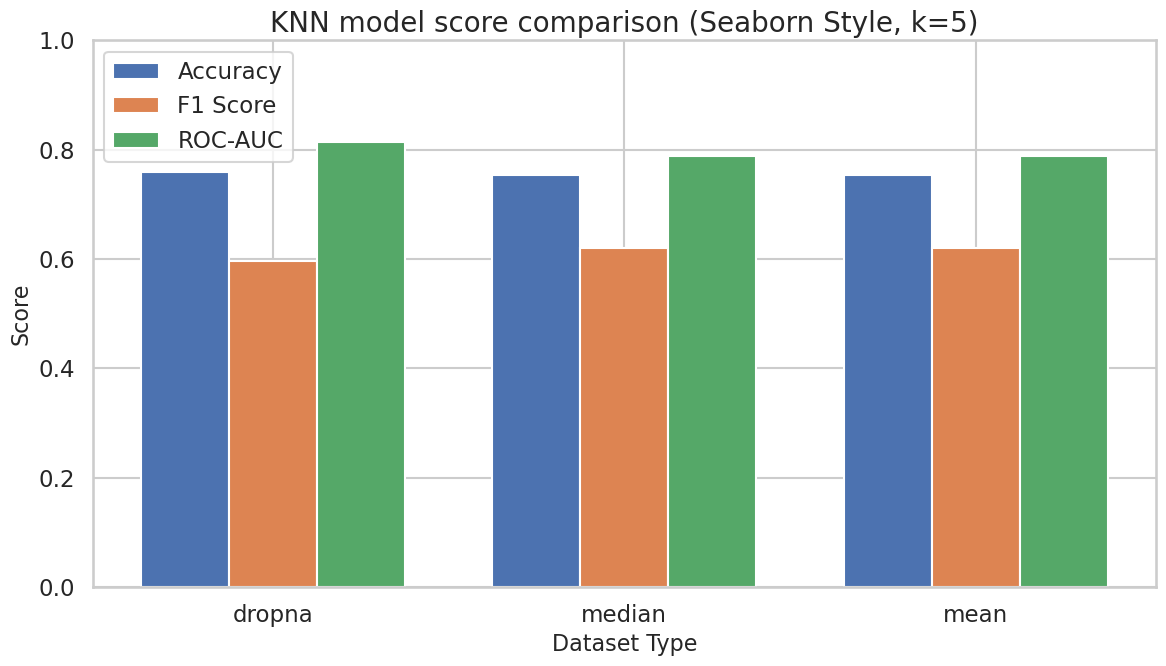

In [11]:
# === 성능 비교 그래프 (Seaborn Style) ===
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# seaborn 스타일 적용
sns.set(style="whitegrid", context="talk")

# 데이터 준비
datasets = results_knn_df["Dataset"]
accuracy = results_knn_df["Accuracy"]
f1 = results_knn_df["F1 Score"]
auc = results_knn_df["KNN AUC"]

# 막대 위치 설정
x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(12, 7))

# 그래프 그리기
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1, width, label='F1 Score')
plt.bar(x + width, auc, width, label='ROC-AUC')

# 축 설정
plt.xticks(x, datasets)
plt.ylim(0, 1)

# 라벨 및 제목
plt.title("KNN model score comparison (Seaborn Style, k=5)", fontsize=20)
plt.xlabel("Dataset Type", fontsize=16)
plt.ylabel("Score", fontsize=16)

# 범례 표시
plt.legend()

# 레이아웃 조절
plt.tight_layout()

# 출력
plt.show()


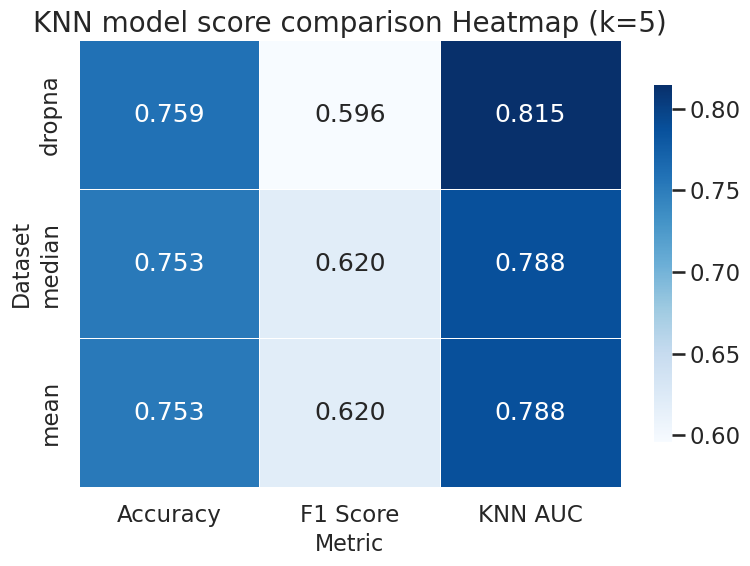

In [12]:
# === 성능 비교 Heatmap (Seaborn Style) ===
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 스타일 적용
sns.set(style="whitegrid", context="talk")

# heatmap용 데이터프레임 만들기
heatmap_df = results_knn_df.set_index("Dataset")

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_df,
    annot=True,      # 값 표시
    cmap="Blues",    # 색상 스타일
    fmt=".3f",       # 소수점 3자리
    linewidths=0.5,  # 칸 구분선
    cbar_kws={"shrink": 0.8}
)

plt.title("KNN model score comparison Heatmap (k=5)", fontsize=20)
plt.ylabel("Dataset", fontsize=16)
plt.xlabel("Metric", fontsize=16)

plt.tight_layout()
plt.show()


In [13]:
#KNN(classifier) 모델 학습 및 평가 - 이웃 수 변경해보기(k = 3)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "median", "mean"] 

results_knn = []

for name in datasets:
    print(f"\n=== KNN 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # 4) KNN 모델 생성 (default k=3)
    kn = KNeighborsClassifier(n_neighbors=3)
    kn.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {kn.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {kn.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = kn.predict(X_test_scaled)
    proba = kn.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    auc = roc_auc_score(y_test, proba) 

    results_knn.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "KNN AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, KNN AUC: {auc:.3f}")

# 결과 표 출력
print("\n=== KNN 모델 평가 결과 (k=3) ===")
results_knn_df = pd.DataFrame(results_knn)
print(results_knn_df)



=== KNN 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.8402555910543131
[dropna] 테스트세트의 성능은 0.7468354430379747
[dropna] Accuracy: 0.747, F1 Score: 0.565, KNN AUC: 0.769

=== KNN 모델 학습 및 평가: median 데이터셋 ===
[median] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[median] 훈련세트의 성능은 0.8403908794788274
[median] 테스트세트의 성능은 0.7337662337662337
[median] Accuracy: 0.734, F1 Score: 0.594, KNN AUC: 0.754

=== KNN 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.8403908794788274
[mean] 테스트세트의 성능은 0.7337662337662337
[mean] Accuracy: 0.734, F1 Score: 0.594, KNN AUC: 0.752

=== KNN 모델 평가 결과 (k=3) ===
  Dataset  Accuracy  F1 Score   KNN AUC
0  dropna  0.746835  0.565217  0.769231
1  median  0.733766  0.594059  0.754352
2    mean  0.733766  0.594059  0.752130


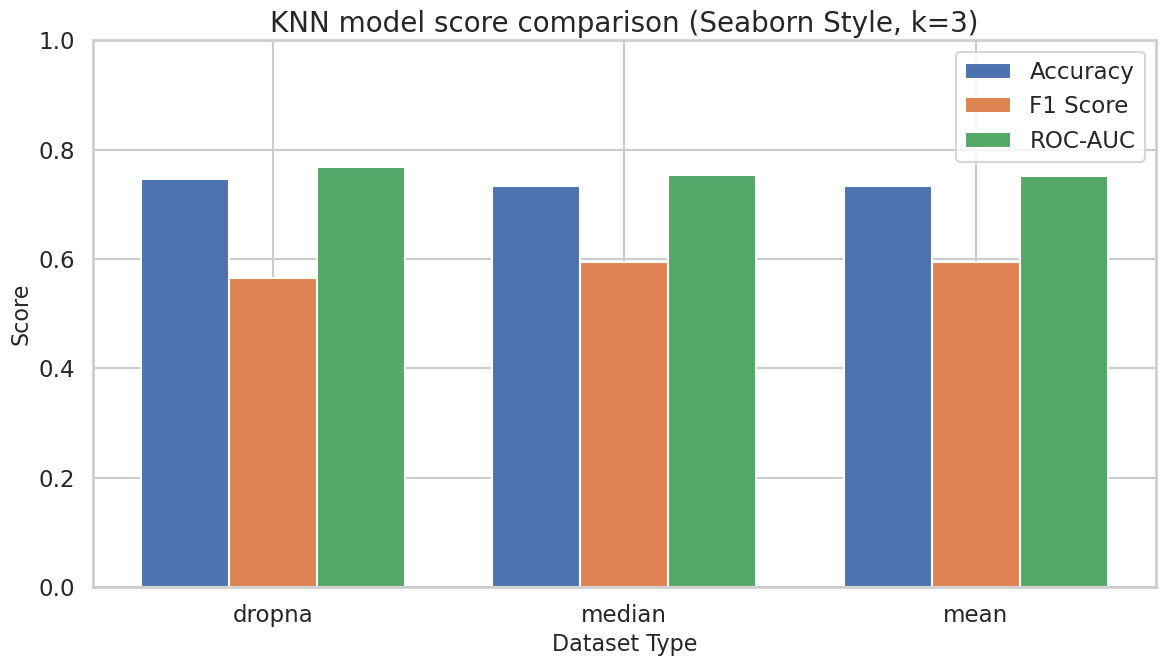

In [14]:
# === 성능 비교 Barplot (Seaborn Style, k=3) ===
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# 데이터 준비
datasets = results_knn_df["Dataset"]
accuracy = results_knn_df["Accuracy"]
f1 = results_knn_df["F1 Score"]
auc = results_knn_df["KNN AUC"]

# 막대 위치 설정
x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(12, 7))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1, width, label='F1 Score')
plt.bar(x + width, auc, width, label='ROC-AUC')

plt.xticks(x, datasets)
plt.ylim(0, 1)

plt.title("KNN model score comparison (Seaborn Style, k=3)", fontsize=20)
plt.xlabel("Dataset Type", fontsize=16)
plt.ylabel("Score", fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


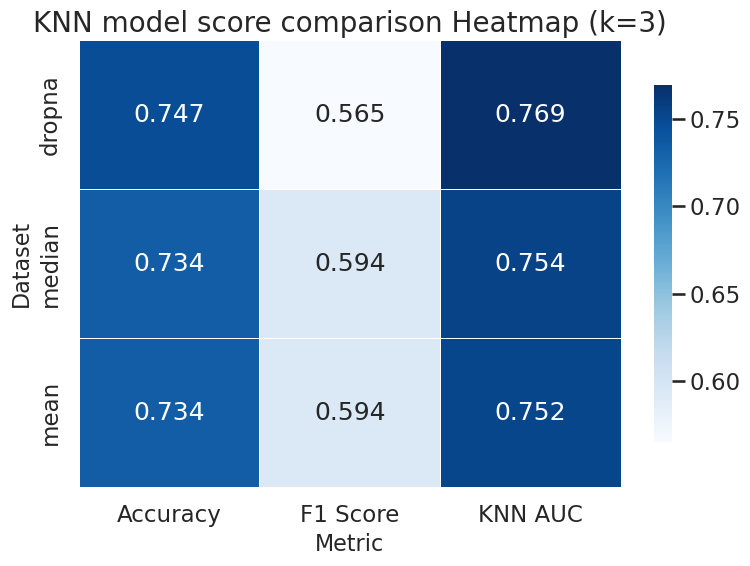

In [15]:
# === 성능 비교 Heatmap (Seaborn Style, k=3) ===
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")

# heatmap용 DF : Dataset을 index로 설정
heatmap_df = results_knn_df.set_index("Dataset")

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("KNN model score comparison Heatmap (k=3)", fontsize=20)
plt.xlabel("Metric", fontsize=16)
plt.ylabel("Dataset", fontsize=16)

plt.tight_layout()
plt.show()


In [16]:
#KNN(classifier) 모델 학습 및 평가 - 이웃 수 변경해보기(k = 10)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "median", "mean"] 

results_knn = []

for name in datasets:
    print(f"\n=== KNN 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # 4) KNN 모델 생성 (default k=10)
    kn = KNeighborsClassifier(n_neighbors=10)
    kn.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {kn.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {kn.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = kn.predict(X_test_scaled)
    proba = kn.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    auc = roc_auc_score(y_test, proba) 

    results_knn.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "KNN AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, KNN AUC: {auc:.3f}")

# 결과 표 출력
print("\n=== KNN 모델 평가 결과 (k=10) ===")
results_knn_df = pd.DataFrame(results_knn)
print(results_knn_df)




=== KNN 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.8146964856230032
[dropna] 테스트세트의 성능은 0.7848101265822784
[dropna] Accuracy: 0.785, F1 Score: 0.622, KNN AUC: 0.847

=== KNN 모델 학습 및 평가: median 데이터셋 ===
[median] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[median] 훈련세트의 성능은 0.7964169381107492
[median] 테스트세트의 성능은 0.7402597402597403
[median] Accuracy: 0.740, F1 Score: 0.565, KNN AUC: 0.797

=== KNN 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.7980456026058632
[mean] 테스트세트의 성능은 0.7402597402597403
[mean] Accuracy: 0.740, F1 Score: 0.565, KNN AUC: 0.795

=== KNN 모델 평가 결과 (k=10) ===
  Dataset  Accuracy  F1 Score   KNN AUC
0  dropna   0.78481  0.622222  0.847242
1  median   0.74026  0.565217  0.797500
2    mean   0.74026  0.565217  0.795370


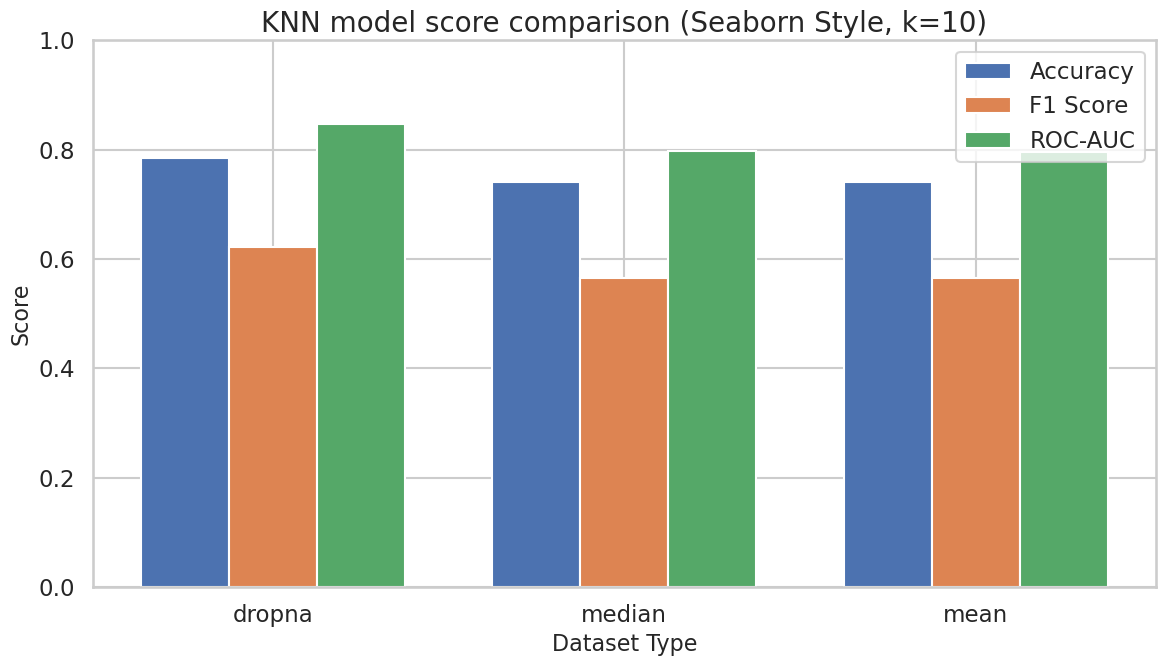

In [17]:
# === 성능 비교 Barplot (Seaborn Style, k=10) ===
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid", context="talk")

datasets = results_knn_df["Dataset"]
accuracy = results_knn_df["Accuracy"]
f1 = results_knn_df["F1 Score"]
auc = results_knn_df["KNN AUC"]

x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(12, 7))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1, width, label='F1 Score')
plt.bar(x + width, auc, width, label='ROC-AUC')

plt.xticks(x, datasets)
plt.ylim(0, 1)

plt.title("KNN model score comparison (Seaborn Style, k=10)", fontsize=20)
plt.xlabel("Dataset Type", fontsize=16)
plt.ylabel("Score", fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


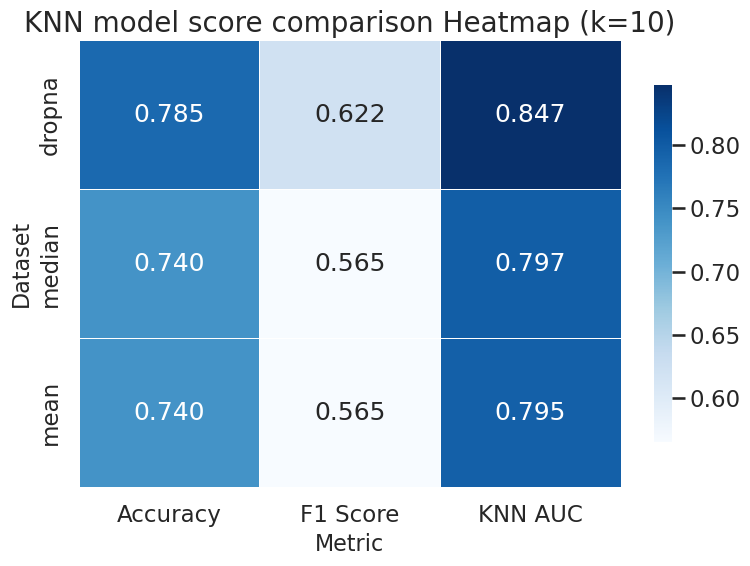

In [18]:
# === 성능 비교 Heatmap (Seaborn Style, k=10) ===
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")

heatmap_df = results_knn_df.set_index("Dataset")

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("KNN model score comparison Heatmap (k=10)", fontsize=20)
plt.xlabel("Metric", fontsize=16)
plt.ylabel("Dataset", fontsize=16)

plt.tight_layout()
plt.show()


In [19]:
#KNN에 대해 3가지 전처리 방법, k = 3, 5, 10에 대해 한 번에 비교해보고 싶음
#Multi-index heatmap을 사용
#먼저, 3가지 결과값들을 하나의 데이터프레임으로 합치기
results_knn_k3 = results_knn_df.copy()
results_knn_k5 = results_knn_df.copy()
results_knn_k10 = results_knn_df.copy()

results_knn_k3["k"] = 3
results_knn_k5["k"] = 5
results_knn_k10["k"] = 10

all_knn = pd.concat([results_knn_k3, results_knn_k5, results_knn_k10])
all_knn = all_knn.set_index(["Dataset", "k"])


print("\n=== 통합 KNN 결과 (MultiIndex) ===")
print(all_knn)



=== 통합 KNN 결과 (MultiIndex) ===
            Accuracy  F1 Score   KNN AUC
Dataset k                               
dropna  3    0.78481  0.622222  0.847242
median  3    0.74026  0.565217  0.797500
mean    3    0.74026  0.565217  0.795370
dropna  5    0.78481  0.622222  0.847242
median  5    0.74026  0.565217  0.797500
mean    5    0.74026  0.565217  0.795370
dropna  10   0.78481  0.622222  0.847242
median  10   0.74026  0.565217  0.797500
mean    10   0.74026  0.565217  0.795370


In [20]:
print(all_knn)


            Accuracy  F1 Score   KNN AUC
Dataset k                               
dropna  3    0.78481  0.622222  0.847242
median  3    0.74026  0.565217  0.797500
mean    3    0.74026  0.565217  0.795370
dropna  5    0.78481  0.622222  0.847242
median  5    0.74026  0.565217  0.797500
mean    5    0.74026  0.565217  0.795370
dropna  10   0.78481  0.622222  0.847242
median  10   0.74026  0.565217  0.797500
mean    10   0.74026  0.565217  0.795370


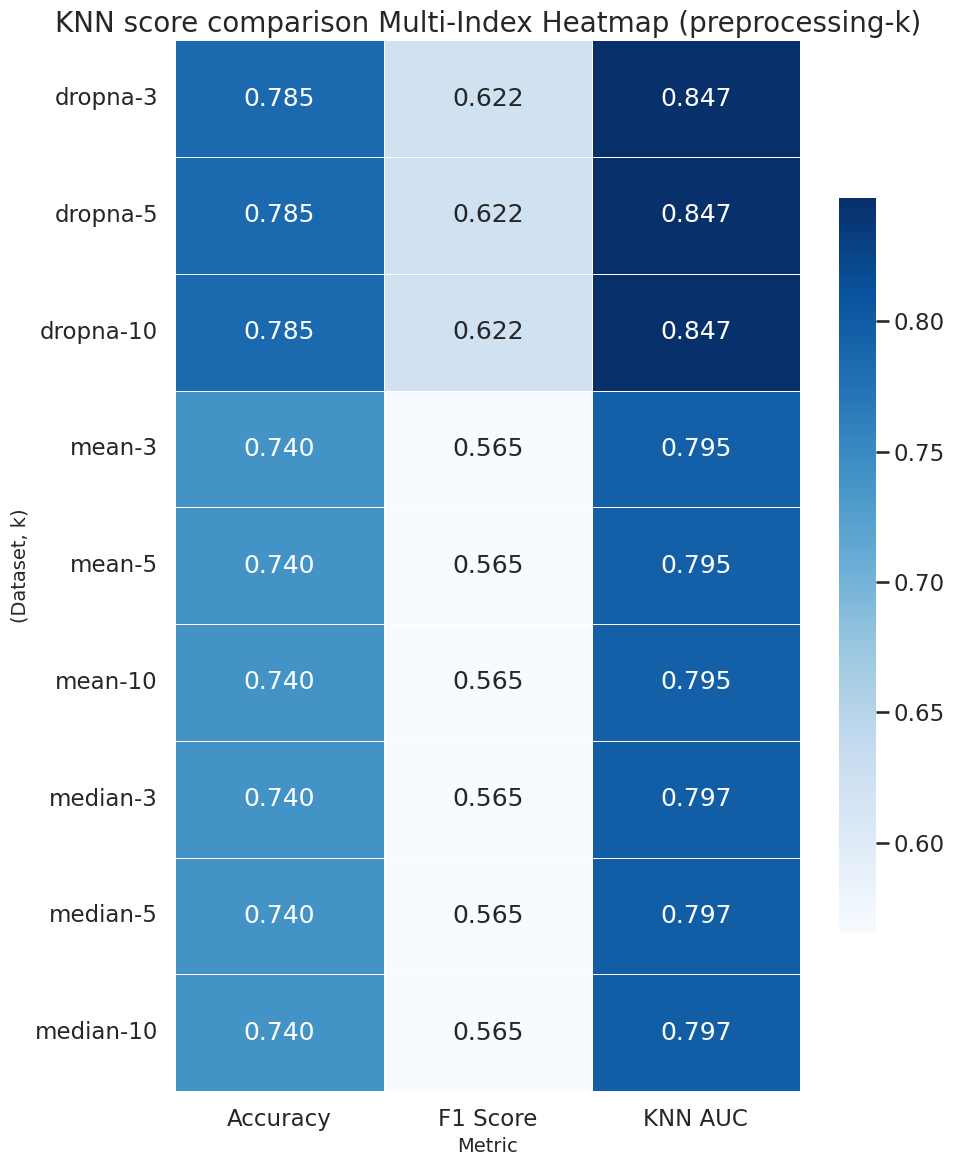

In [21]:
# === Multi-index Heatmap (9개 모델 비교) ===
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 12))

# Dataset, k 중복 제거
df_no_dup = (
    all_knn.reset_index()
    .drop_duplicates(subset=["Dataset", "k"])
)

# 1) melt로 long-form으로 변환
df_melt = df_no_dup.melt(
    id_vars=["Dataset", "k"],
    value_vars=["Accuracy", "F1 Score", "KNN AUC"],
    var_name="Metric",
    value_name="Score"
)

# 2) pivot으로 heatmap 데이터 구성
heatmap_data = df_melt.pivot(
    index=["Dataset", "k"],
    columns="Metric",
    values="Score"
)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title("KNN score comparison Multi-Index Heatmap (preprocessing-k)", fontsize=20)
plt.ylabel("(Dataset, k)", fontsize=14)
plt.xlabel("Metric", fontsize=14)

plt.tight_layout()
plt.show()


In [22]:
#Logistic Regression 모델 학습 및 평가
#Logistic Regression은 이름은 회귀이지만 분류 모델
#Logistic Regression 모델은 당뇨병 여부 (y/n)를 예측하기에 가장 적합한 모델 중 하나
#규제완화 버전 (C=20) = 교재 설정값
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "median", "mean"] 
results_log = []

for name in datasets:
    print(f"\n=== Logistic Regression 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # 4) Logistic Regression 모델 생성 (C=20, max_iter=1000)
    lr = LogisticRegression(C=20, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {lr.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {lr.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = lr.predict(X_test_scaled) #당뇨인지 아닌지를 판단 (1 or 0)
    proba = lr.predict_proba(X_test_scaled)[:, 1] #당뇨일 확률을 계산

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_log.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Logistic AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, Logistic AUC: {auc:.3f}")

# 성능 결과 표 출력
print("\n=== Logistic Regression 모델 평가 결과 ===")
print(pd.DataFrame(results_log))



=== Logistic Regression 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.7731629392971247
[dropna] 테스트세트의 성능은 0.8227848101265823
[dropna] Accuracy: 0.823, F1 Score: 0.720, Logistic AUC: 0.891

=== Logistic Regression 모델 학습 및 평가: median 데이터셋 ===
[median] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[median] 훈련세트의 성능은 0.7947882736156352
[median] 테스트세트의 성능은 0.6948051948051948
[median] Accuracy: 0.695, F1 Score: 0.525, Logistic AUC: 0.812

=== Logistic Regression 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.7980456026058632
[mean] 테스트세트의 성능은 0.6948051948051948
[mean] Accuracy: 0.695, F1 Score: 0.525, Logistic AUC: 0.812

=== Logistic Regression 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score  Logistic AUC
0  dropna  0.822785  0.720000      0.891147
1  median  0.694805  0.525253      0.812407
2    mean  0.694805  0.525253      0.812407


In [23]:
#Logistic Regression 모델 학습 및 평가
#Logistic Regression은 이름은 회귀이지만 분류 모델
#Logistic Regression 모델은 당뇨병 여부 (y/n)를 예측하기에 가장 적합한 모델 중 하나
#규제 강화 버전 (C=1, default)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "median", "mean"] 
results_log = []

for name in datasets:
    print(f"\n=== Logistic Regression 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # 4) Logistic Regression 모델 생성 (C=1, max_iter=1000)
    lr = LogisticRegression(C=1, max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {lr.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {lr.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = lr.predict(X_test_scaled)
    proba = lr.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_log.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Logistic AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, Logistic AUC: {auc:.3f}")

# 성능 결과 표 출력
print("\n=== Logistic Regression 모델 평가 결과 ===")
print(pd.DataFrame(results_log))
#C = 1이거나 규제를 완화한 C = 20이나 동일함



=== Logistic Regression 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.7731629392971247
[dropna] 테스트세트의 성능은 0.8227848101265823
[dropna] Accuracy: 0.823, F1 Score: 0.720, Logistic AUC: 0.891

=== Logistic Regression 모델 학습 및 평가: median 데이터셋 ===
[median] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[median] 훈련세트의 성능은 0.7964169381107492
[median] 테스트세트의 성능은 0.6948051948051948
[median] Accuracy: 0.695, F1 Score: 0.525, Logistic AUC: 0.812

=== Logistic Regression 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.7980456026058632
[mean] 테스트세트의 성능은 0.6948051948051948
[mean] Accuracy: 0.695, F1 Score: 0.525, Logistic AUC: 0.812

=== Logistic Regression 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score  Logistic AUC
0  dropna  0.822785  0.720000      0.891147
1  median  0.694805  0.525253      0.812037
2    mean  0.694805  0.525253      0.812037


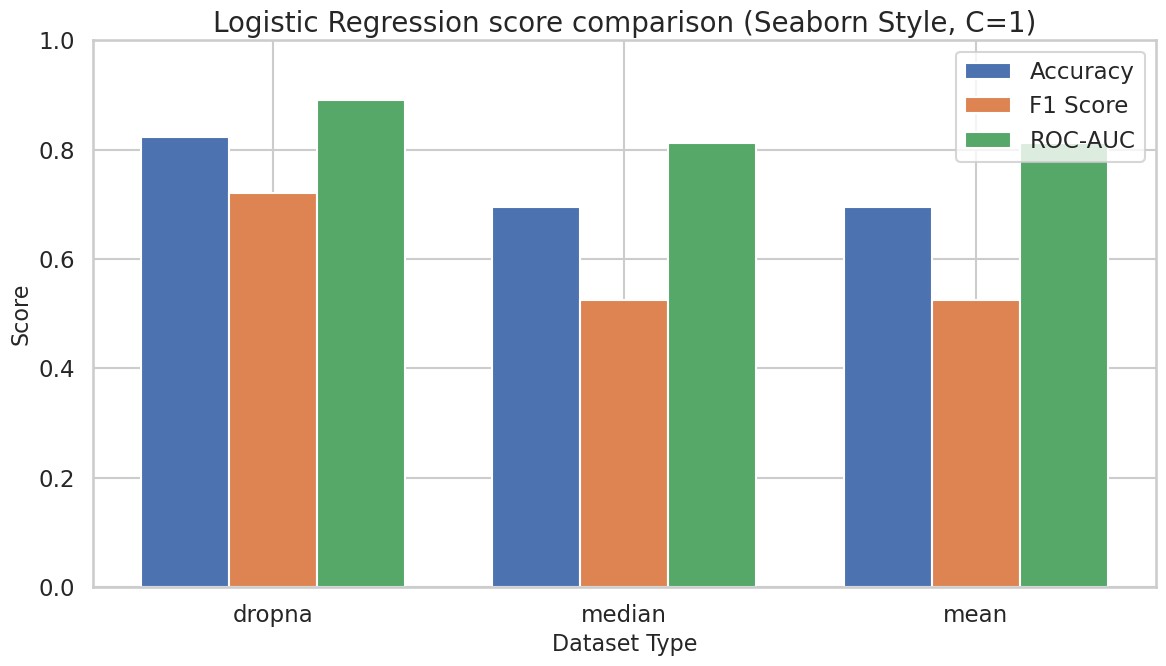

In [24]:
#규제 강화한 C=1 버전으로 그래프 작성
# === Logistic Regression 성능 Barplot (Seaborn Style, C=1) ===
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid", context="talk")

datasets = pd.DataFrame(results_log)["Dataset"]
accuracy = pd.DataFrame(results_log)["Accuracy"]
f1 = pd.DataFrame(results_log)["F1 Score"]
auc = pd.DataFrame(results_log)["Logistic AUC"]

x = np.arange(len(datasets))
width = 0.25

plt.figure(figsize=(12, 7))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1, width, label='F1 Score')
plt.bar(x + width, auc, width, label='ROC-AUC')

plt.xticks(x, datasets)
plt.ylim(0, 1)

plt.title("Logistic Regression score comparison (Seaborn Style, C=1)", fontsize=20)
plt.xlabel("Dataset Type", fontsize=16)
plt.ylabel("Score", fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


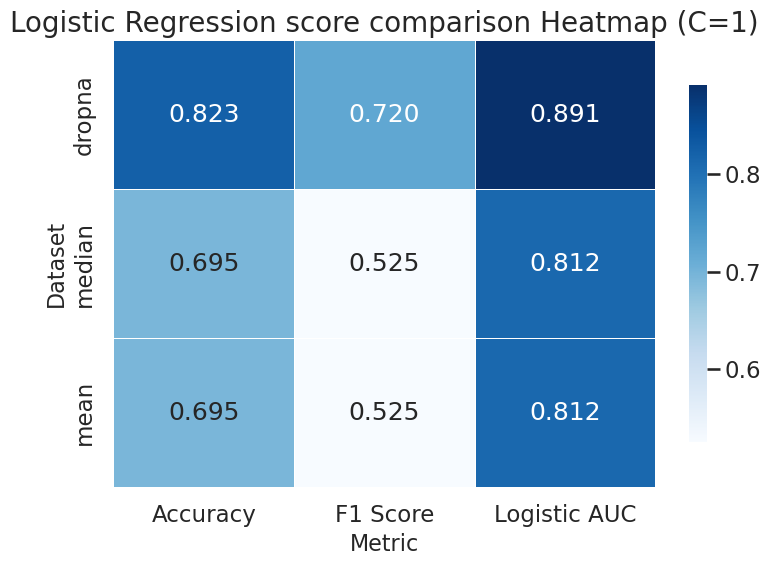

In [25]:
# === Logistic Regression 성능 Heatmap (Seaborn Style, C=1) ===
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", context="talk")

heatmap_df = pd.DataFrame(results_log).set_index("Dataset")

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Logistic Regression score comparison Heatmap (C=1)", fontsize=20)
plt.xlabel("Metric", fontsize=16)
plt.ylabel("Dataset", fontsize=16)

plt.tight_layout()
plt.show()


In [26]:
#SGDClassifier
#앞선 모델들에서 mean과 median은 큰 차이를 보이지 않음
#따라서 dropna와 mean 데이터셋만을 사용하겠음
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#dropna와 mean만 사용
datasets = ["dropna", "mean"]  
results_sgd = []


for name in datasets:
    print(f"\n=== SGD Classifier 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # 4) SGDClassifier 생성
    # loss="log_loss" → 로지스틱 회귀와 동일한 확률 기반 분류
    # max_iter = 10 은 교재의 설정값 참고
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)
    sgd.fit(X_train_scaled, y_train)
    print(sgd.score(X_train_scaled, y_train))
    print(sgd.score(X_test_scaled, y_test))
#현재 max_iter = 10으로 설정해서 경고 메세지 출력됨
#또한 epoch도 수행하지 않아서 성능이 낮은 것을 알 수 있음




=== SGD Classifier 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
0.7060702875399361
0.7341772151898734

=== SGD Classifier 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
0.6954397394136808
0.6428571428571429


/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


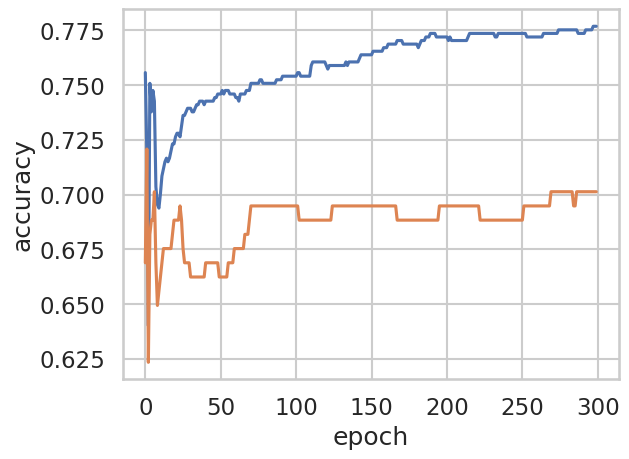

In [27]:
#epoch 마다 훈련 세트와 테스트 세트의 점수 기록
import numpy as np
sgd = SGDClassifier(loss='log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(y_train)
#결과는 array([0, 1])

#300번의 에포크 실행
for _ in range(0, 300):
    sgd.partial_fit(X_train_scaled, y_train, classes = classes)
    train_score.append(sgd.score(X_train_scaled, y_train))
    test_score.append(sgd.score(X_test_scaled, y_test))

#그래프로 결과 확인
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#결과가 현저히 낮음
#max_iter(훈련 데이터를 몇 번 반복해서 학습할지)를 100으로 높여 보기로 생각했지만
#epoch는 partial_fit을 몇번 반복할지를 나타내는 값
#또한 max_iter만큼 반복되는 fit()과 for문을 반복학습하는 epoch(partial_fit)은 별개이고
#partial_fit()을 사용하면 amx_iter는 무효화
#따라서 epoch를 다양화하여 최적값을 찾기 보다는 max_iter를 높여보기

In [28]:
#SGDClassifier
#앞선 모델들에서 mean과 median은 큰 차이를 보이지 않음
#따라서 dropna와 mean 데이터셋만을 사용하겠음
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#dropna와 mean만 사용
datasets = ["dropna", "mean"]  
results_sgd = []


for name in datasets:
    print(f"\n=== SGD Classifier 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # 4) SGDClassifier 생성
    # loss="log_loss" → 로지스틱 회귀와 동일한 확률 기반 분류
    # max_iter = 100 은 교재의 설정값(p222) 참고
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss="log_loss", max_iter=100, random_state=42)
    sgd.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {sgd.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {sgd.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = sgd.predict(X_test_scaled)
    proba = sgd.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_sgd.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "SGD AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, SGD AUC: {auc:.3f}")

# 결과 출력
print("\n=== SGD Classifier 모델 평가 결과 ===")
results_sgd_df = pd.DataFrame(results_sgd)
print(results_sgd_df)



=== SGD Classifier 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784
[dropna] Accuracy: 0.785, F1 Score: 0.622, SGD AUC: 0.809

=== SGD Classifier 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753
[mean] Accuracy: 0.675, F1 Score: 0.545, SGD AUC: 0.770

=== SGD Classifier 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score   SGD AUC
0  dropna  0.784810  0.622222  0.809144
1    mean  0.675325  0.545455  0.769815


In [29]:
#SGDClassifier
#앞선 모델들에서 mean과 median은 큰 차이를 보이지 않음
#따라서 dropna와 mean 데이터셋만을 사용하겠음
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#dropna와 mean만 사용
datasets = ["dropna", "mean"]  
results_sgd = []


for name in datasets:
    print(f"\n=== SGD Classifier 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # 4) SGDClassifier 생성
    # loss="log_loss" → 로지스틱 회귀와 동일한 확률 기반 분류
    # max_iter = 500
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss="log_loss", max_iter=500, random_state=42)
    sgd.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {sgd.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {sgd.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = sgd.predict(X_test_scaled)
    proba = sgd.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_sgd.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "SGD AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, SGD AUC: {auc:.3f}")

# 결과 출력
print("\n=== SGD Classifier 모델 평가 결과 ===")
results_sgd_df = pd.DataFrame(results_sgd)
print(results_sgd_df)



=== SGD Classifier 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784
[dropna] Accuracy: 0.785, F1 Score: 0.622, SGD AUC: 0.809

=== SGD Classifier 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753
[mean] Accuracy: 0.675, F1 Score: 0.545, SGD AUC: 0.770

=== SGD Classifier 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score   SGD AUC
0  dropna  0.784810  0.622222  0.809144
1    mean  0.675325  0.545455  0.769815


In [30]:
#SGDClassifier
#앞선 모델들에서 mean과 median은 큰 차이를 보이지 않음
#따라서 dropna와 mean 데이터셋만을 사용하겠음
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#dropna와 mean만 사용
datasets = ["dropna", "mean"]  
results_sgd = []


for name in datasets:
    print(f"\n=== SGD Classifier 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # 4) SGDClassifier 생성
    # loss="log_loss" → 로지스틱 회귀와 동일한 확률 기반 분류
    # max_iter = 1000
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
    sgd.fit(X_train_scaled, y_train)
    print(f"[{name}] 훈련세트의 성능은 {sgd.score(X_train_scaled, y_train)}")
    print(f"[{name}] 테스트세트의 성능은 {sgd.score(X_test_scaled, y_test)}")
    
    # 5) 예측 수행
    pred = sgd.predict(X_test_scaled)
    proba = sgd.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_sgd.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "SGD AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, SGD AUC: {auc:.3f}")

# 결과 출력
print("\n=== SGD Classifier 모델 평가 결과 ===")
results_sgd_df = pd.DataFrame(results_sgd)
print(results_sgd_df)



=== SGD Classifier 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784
[dropna] Accuracy: 0.785, F1 Score: 0.622, SGD AUC: 0.809

=== SGD Classifier 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753
[mean] Accuracy: 0.675, F1 Score: 0.545, SGD AUC: 0.770

=== SGD Classifier 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score   SGD AUC
0  dropna  0.784810  0.622222  0.809144
1    mean  0.675325  0.545455  0.769815


In [31]:
#SGDClassifier에서 max_iter(10, 100, 500, 1000)와 전처리 방법(dropna, mean)
#값에 따른 성능 비교 -> multi-index heatmap

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "mean"]
max_iters = [10, 100, 500, 1000]

results = []

for name in datasets:
    for m in max_iters:
        print(f"\n=== SGDClassifier: {name}, max_iter={m} ===")
        
        # 1) 데이터 로딩
        X_train = pd.read_csv(f"{name}_train_20251120.csv")
        X_test = pd.read_csv(f"{name}_test_20251120.csv")
        y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
        y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

        # 2) 인슐린 변수 제거
        insulin_col = 'Serum_Insulin(mu_U/ml)'
        if insulin_col in X_train.columns:
            X_train = X_train.drop(columns=[insulin_col])
            X_test = X_test.drop(columns=[insulin_col])

        # 3) 표준화 (scaling)
        ss = StandardScaler()
        ss.fit(X_train)
        X_train_scaled = ss.transform(X_train)
        X_test_scaled = ss.transform(X_test)

        # 4) SGDClassifier 생성
        sgd = SGDClassifier(loss="log_loss", max_iter=m, random_state=42)
        sgd.fit(X_train_scaled, y_train)
        print(f"[{name}] 훈련세트의 성능은 {sgd.score(X_train_scaled, y_train)}")
        print(f"[{name}] 테스트세트의 성능은 {sgd.score(X_test_scaled, y_test)}")

        # 5) 예측
        pred = sgd.predict(X_test_scaled)
        proba = sgd.predict_proba(X_test_scaled)[:, 1]

        # 6) 성능 평가 수집
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        auc = roc_auc_score(y_test, proba)

        # 리스트에 저장 (MultiIndex Heatmap용)
        results.append([name, m, acc, f1, auc])

# DataFrame으로 변환
results_df = pd.DataFrame(results, columns=["Dataset", "max_iter", "Accuracy", "F1 Score", "AUC"])
print("\n=== 전체 성능 결과 ===")
print(results_df)



=== SGDClassifier: dropna, max_iter=10 ===
[dropna] 훈련세트의 성능은 0.7060702875399361
[dropna] 테스트세트의 성능은 0.7341772151898734

=== SGDClassifier: dropna, max_iter=100 ===
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784

=== SGDClassifier: dropna, max_iter=500 ===
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784

=== SGDClassifier: dropna, max_iter=1000 ===
[dropna] 훈련세트의 성능은 0.7412140575079872
[dropna] 테스트세트의 성능은 0.7848101265822784

=== SGDClassifier: mean, max_iter=10 ===
[mean] 훈련세트의 성능은 0.6954397394136808
[mean] 테스트세트의 성능은 0.6428571428571429

=== SGDClassifier: mean, max_iter=100 ===
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753

=== SGDClassifier: mean, max_iter=500 ===
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753

=== SGDClassifier: mean, max_iter=1000 ===
[mean] 훈련세트의 성능은 0.758957654723127
[mean] 테스트세트의 성능은 0.6753246753246753

=== 전체 성능 결과 ===
  Dataset  max_iter  Accuracy  F1

/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hagyeong/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


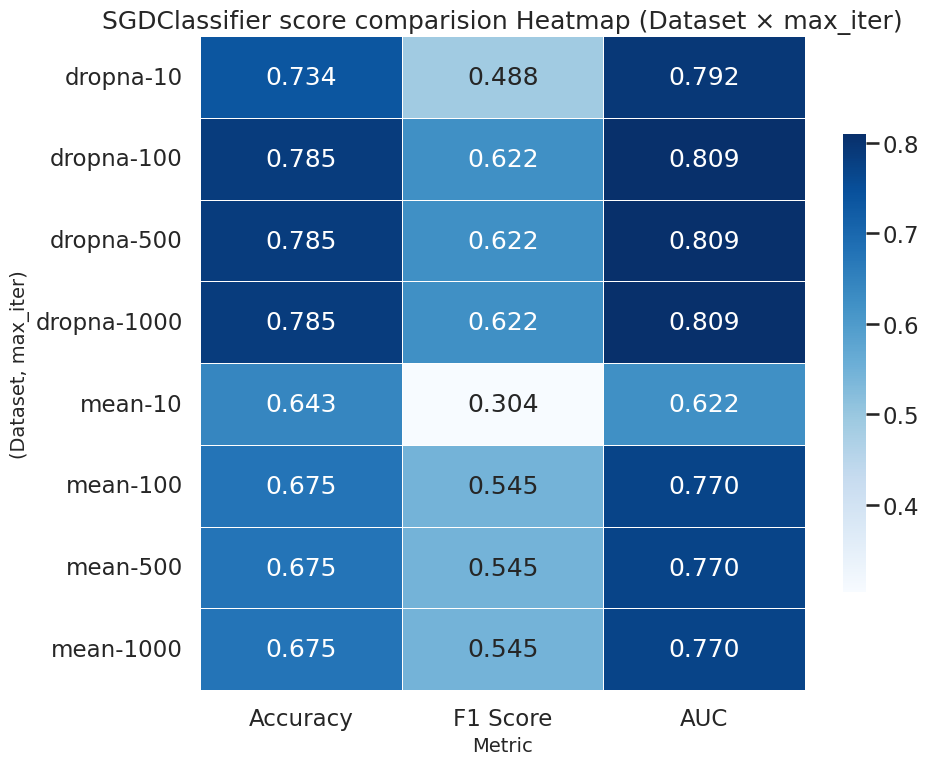

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# MultiIndex로 변환
heatmap_df = results_df.set_index(["Dataset", "max_iter"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title("SGDClassifier score comparision Heatmap (Dataset × max_iter)", fontsize=18)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("(Dataset, max_iter)", fontsize=14)

plt.tight_layout()
plt.show()
#max_iter가 100에서 1000까지 증가시켜보았지만 동일함



=== Decision Tree Classifier 모델 학습 및 평가: dropna 데이터셋 ===
[dropna] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
훈련세트의 성능은 1.0
테스트세트의 성능은 0.6962025316455697
[dropna] Accuracy: 0.823, F1 Score: 0.741, SGD AUC: 0.876

=== Decision Tree Classifier 모델 학습 및 평가: mean 데이터셋 ===
[mean] 'Serum_Insulin(mu_U/ml)' 변수 제거 완료
훈련세트의 성능은 1.0
테스트세트의 성능은 0.6623376623376623
[mean] Accuracy: 0.675, F1 Score: 0.545, SGD AUC: 0.770

=== SGD Classifier 모델 평가 결과 ===
  Dataset  Accuracy  F1 Score   SGD AUC
0  dropna  0.822785  0.740741  0.875907
1    mean  0.675325  0.545455  0.769815


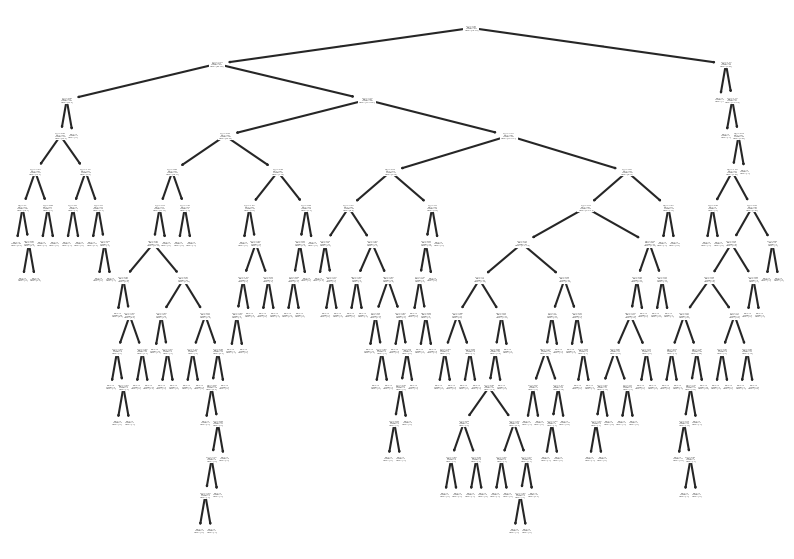

트리 깊이: 14
리프 노드 수: 115


In [34]:
#Decision Tree algorithm

datasets = ["dropna", "mean"]  
results_sgd = []


for name in datasets:
    print(f"\n=== Decision Tree Classifier 모델 학습 및 평가: {name} 데이터셋 ===")

    # 1) 데이터 로딩
    X_train = pd.read_csv(f"{name}_train_20251120.csv")
    X_test = pd.read_csv(f"{name}_test_20251120.csv")
    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

    # 2) 인슐린 변수 제거
    insulin_col = 'Serum_Insulin(mu_U/ml)'
    if insulin_col in X_train.columns:
        X_train = X_train.drop(columns=[insulin_col])
        X_test = X_test.drop(columns=[insulin_col])
        print(f"[{name}] '{insulin_col}' 변수 제거 완료")
    
    # 3) 표준화 전처리
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # 4) Decision Tree Classifier 생성
    #가지치기 상관없이 일단 출력
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state= 42)
    dt.fit(X_train_scaled, y_train)
    print(f"훈련세트의 성능은 {dt.score(X_train_scaled, y_train)}")
    print(f"테스트세트의 성능은 {dt.score(X_test_scaled, y_test)}")

    # 5) 예측 수행
    pred = sgd.predict(X_test_scaled)
    proba = sgd.predict_proba(X_test_scaled)[:, 1]

    # 6) 성능 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    results_sgd.append({
        "Dataset": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "SGD AUC": auc
    })

    print(f"[{name}] Accuracy: {acc:.3f}, F1 Score: {f1:.3f}, SGD AUC: {auc:.3f}")

# 결과 출력
print("\n=== SGD Classifier 모델 평가 결과 ===")
results_sgd_df = pd.DataFrame(results_sgd)
print(results_sgd_df)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

#테스트세트가 현저히 낮은 것으로 보아 과대적합된 모델임

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print("트리 깊이:", dt.get_depth())
print("리프 노드 수:", dt.get_n_leaves())

In [35]:
#Decision Tree 가지치기
#loop를 이용해서 트리 깊이를 3~14개 바꿔가며 성능 평가해보기
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "mean"]
depth_range = range(3, 15)   # 3 ~ 14까지의 트리깊이
results_dt = []

for name in datasets: #전처리 방법에 따라 (dropna, mean)
    for depth in depth_range: #트리 깊이에 따라
        print(f"\n=== Decision Tree: {name}, max_depth={depth} ===")

        # 1) 데이터 로딩
        X_train = pd.read_csv(f"{name}_train_20251120.csv")
        X_test = pd.read_csv(f"{name}_test_20251120.csv")
        y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
        y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

        # 2) 인슐린 변수 제거
        insulin_col = 'Serum_Insulin(mu_U/ml)'
        if insulin_col in X_train.columns:
            X_train = X_train.drop(columns=[insulin_col])
            X_test = X_test.drop(columns=[insulin_col])

        # 3) 표준화
        ss = StandardScaler()
        ss.fit(X_train)
        X_train_scaled = ss.transform(X_train)
        X_test_scaled = ss.transform(X_test)

        # 4) DT 모델 생성
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt.fit(X_train_scaled, y_train)
        print(f"[{name}]+[{depth}] 훈련세트의 성능은 {dt.score(X_train_scaled, y_train)}")
        print(f"[{name}]+[{depth}] 테스트세트의 성능은 {dt.score(X_test_scaled, y_test)}")

        # 5) 예측
        pred = dt.predict(X_test_scaled)
        proba = dt.predict_proba(X_test_scaled)[:, 1]

        # 6) 성능 계산
        acc = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        auc = roc_auc_score(y_test, proba)

        # 저장
        results_dt.append([name, depth, acc, f1, auc])

# 결과를 DataFrame으로 변환
results_dt_df = pd.DataFrame(
    results_dt,
    columns=["Dataset", "max_depth", "Accuracy", "F1 Score", "AUC"]
)

print("\n=== 모든 max_depth 성능 결과 ===")
print(results_dt_df)



=== Decision Tree: dropna, max_depth=3 ===
[dropna]+[3] 훈련세트의 성능은 0.8178913738019169
[dropna]+[3] 테스트세트의 성능은 0.8227848101265823

=== Decision Tree: dropna, max_depth=4 ===
[dropna]+[4] 훈련세트의 성능은 0.8498402555910544
[dropna]+[4] 테스트세트의 성능은 0.7974683544303798

=== Decision Tree: dropna, max_depth=5 ===
[dropna]+[5] 훈련세트의 성능은 0.8849840255591054
[dropna]+[5] 테스트세트의 성능은 0.7468354430379747

=== Decision Tree: dropna, max_depth=6 ===
[dropna]+[6] 훈련세트의 성능은 0.9073482428115016
[dropna]+[6] 테스트세트의 성능은 0.7721518987341772

=== Decision Tree: dropna, max_depth=7 ===
[dropna]+[7] 훈련세트의 성능은 0.952076677316294
[dropna]+[7] 테스트세트의 성능은 0.7721518987341772

=== Decision Tree: dropna, max_depth=8 ===
[dropna]+[8] 훈련세트의 성능은 0.9616613418530351
[dropna]+[8] 테스트세트의 성능은 0.7341772151898734

=== Decision Tree: dropna, max_depth=9 ===
[dropna]+[9] 훈련세트의 성능은 0.987220447284345
[dropna]+[9] 테스트세트의 성능은 0.7215189873417721

=== Decision Tree: dropna, max_depth=10 ===
[dropna]+[10] 훈련세트의 성능은 0.9968051118210862
[dropna]+[1

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)

print("Decision Tree 최적 파라미터:", grid_tree.best_params_)
print("최고 점수:", grid_tree.best_score_)


Decision Tree 최적 파라미터: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}
최고 점수: 0.7811537929125139


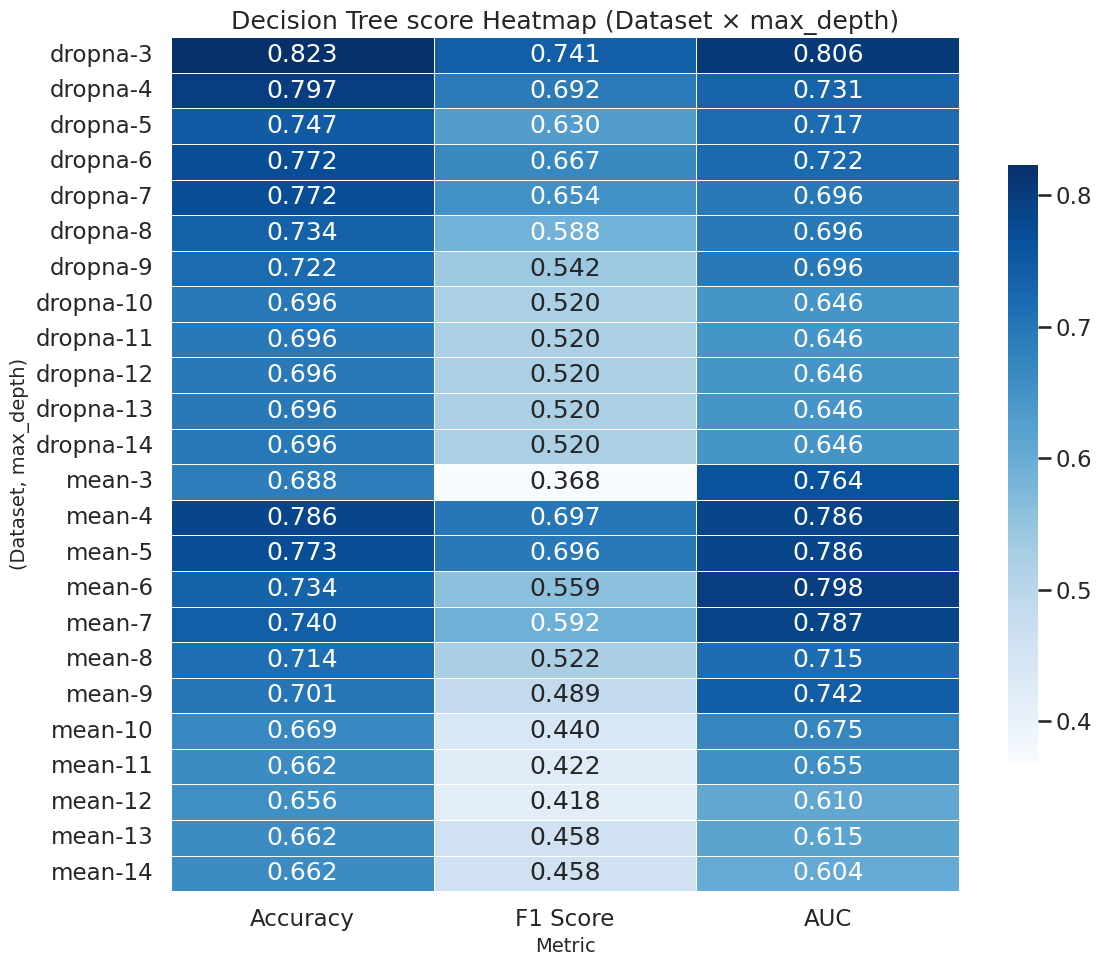

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MultiIndex로 변환 (Dataset, max_depth)
heatmap_df = results_dt_df.set_index(["Dataset", "max_depth"])

plt.figure(figsize=(12, 10))

sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title("Decision Tree score Heatmap (Dataset × max_depth)", fontsize=18)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("(Dataset, max_depth)", fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

datasets = ["dropna", "mean"]
depth_range = range(3, 14)   # 3 ~ 13까지의 트리깊이
results_dt = []

for name in datasets: #전처리 방법에 따라 (dropna, mean)
    for depth in depth_range: #트리 깊이에 따라
        print(f"\n=== Decision Tree: {name}, max_depth={depth} ===")

        # 1) 데이터 로딩
        X_train = pd.read_csv(f"{name}_train_20251120.csv")
        X_test = pd.read_csv(f"{name}_test_20251120.csv")
        y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
        y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

        # 2) 인슐린 변수 제거
        insulin_col = 'Serum_Insulin(mu_U/ml)'
        if insulin_col in X_train.columns:
            X_train = X_train.drop(columns=[insulin_col])
            X_test = X_test.drop(columns=[insulin_col])

        # 3) 표준화
        ss = StandardScaler()
        ss.fit(X_train)
        X_train_scaled = ss.transform(X_train)
        X_test_scaled = ss.transform(X_test)

        # 4) 검증 세트 만들기
        sub_input, val_input, sub_target, val_target = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42
        )
        print(f"[{name}]+[{depth}] 검증세트 사이즈는 {sub_input.shape}, {val_input.shape}")
        
        # 4) 검증 세트로 DT 모델 생성
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt.fit(sub_input, sub_target)
        print(f"[{name}]+[{depth}] 훈련세트의 성능은 {dt.score(sub_input, sub_target)}")
        print(f"[{name}]+[{depth}] 테스트세트의 성능은 {dt.score(val_input, val_target)}")

        # 5) 예측
        pred = dt.predict(val_input)
        proba = dt.predict_proba(val_input)[:, 1]

        # 6) 성능 계산
        acc = accuracy_score(val_target, pred)
        f1 = f1_score(val_target, pred)
        auc = roc_auc_score(val_target, proba)

        # 저장
        results_dt.append([name, depth, acc, f1, auc])

# 결과를 DataFrame으로 변환
results_dt_df = pd.DataFrame(
    results_dt,
    columns=["Dataset", "max_depth", "Accuracy", "F1 Score", "AUC"]
)

print("\n=== 모든 검증 세트의 max_depth에 따른 성능 결과 ===")
print(results_dt_df)



=== Decision Tree: dropna, max_depth=3 ===
[dropna]+[3] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[3] 훈련세트의 성능은 0.832
[dropna]+[3] 테스트세트의 성능은 0.7301587301587301

=== Decision Tree: dropna, max_depth=4 ===
[dropna]+[4] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[4] 훈련세트의 성능은 0.856
[dropna]+[4] 테스트세트의 성능은 0.7777777777777778

=== Decision Tree: dropna, max_depth=5 ===
[dropna]+[5] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[5] 훈련세트의 성능은 0.892
[dropna]+[5] 테스트세트의 성능은 0.7619047619047619

=== Decision Tree: dropna, max_depth=6 ===
[dropna]+[6] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[6] 훈련세트의 성능은 0.924
[dropna]+[6] 테스트세트의 성능은 0.7142857142857143

=== Decision Tree: dropna, max_depth=7 ===
[dropna]+[7] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[7] 훈련세트의 성능은 0.948
[dropna]+[7] 테스트세트의 성능은 0.7142857142857143

=== Decision Tree: dropna, max_depth=8 ===
[dropna]+[8] 검증세트 사이즈는 (250, 7), (63, 7)
[dropna]+[8] 훈련세트의 성능은 0.968
[dropna]+[8] 테스트세트의 성능은 0.7142857142857143

=== Decision Tree: dropna, max_depth=9 ===
[dropna]+[9] 검

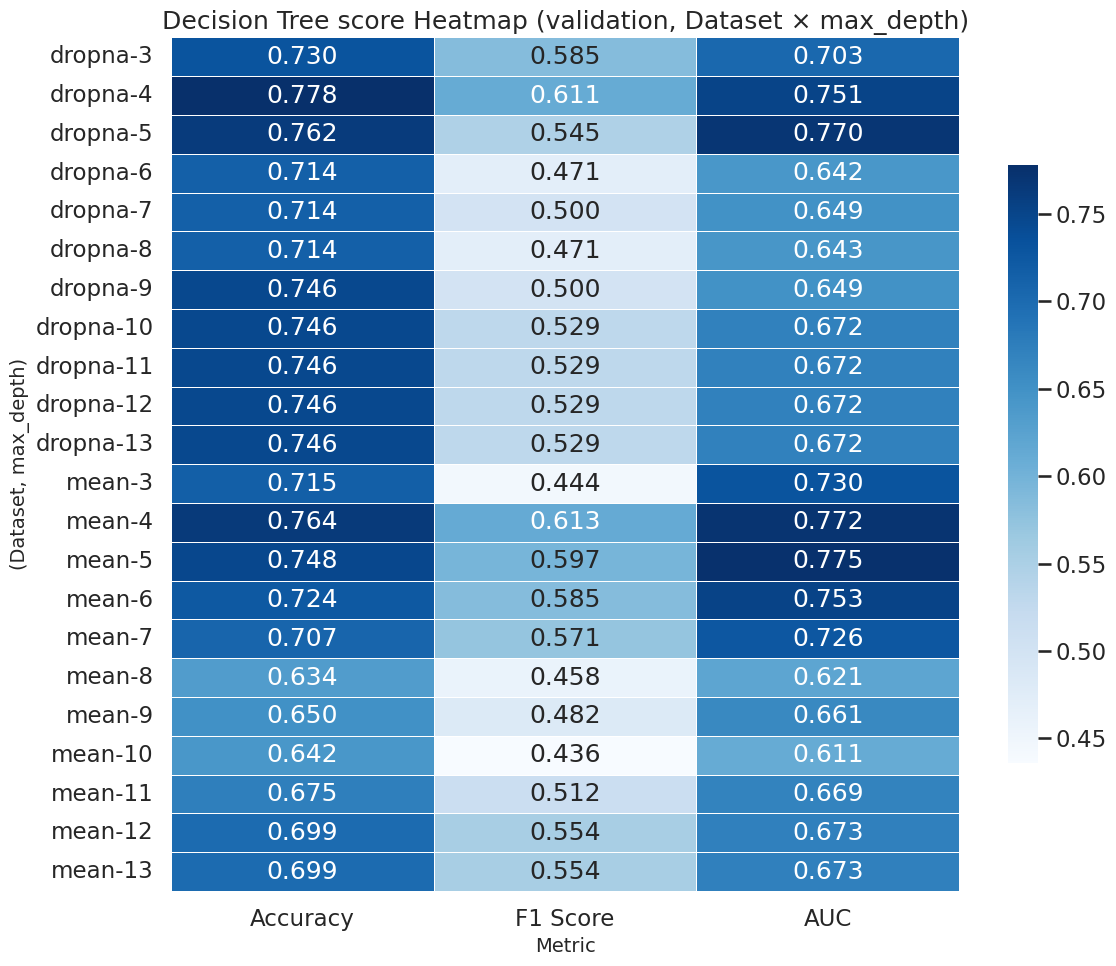

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# MultiIndex로 변환 (Dataset, max_depth)
heatmap_df = results_dt_df.set_index(["Dataset", "max_depth"])

plt.figure(figsize=(12, 10))

sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)

plt.title("Decision Tree score Heatmap (validation, Dataset × max_depth)", fontsize=18)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("(Dataset, max_depth)", fontsize=14)

plt.tight_layout()
plt.show()

#depth=4, 5 정도가 가장 성능이 좋은 것으로 생각됨

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 전처리 방법
datasets = ["dropna", "mean"]

# 하이퍼파라미터 후보군
depth_range = range(3, 15)                   # max_depth 3~14
min_split_list = [2, 5]                      # min_samples_split
min_leaf_list = [1, 3]                       # min_samples_leaf
criteria = ["gini", "entropy"]               # criterion

results_dt = []

for name in datasets:
    for depth in depth_range:
        for min_split in min_split_list:
            for min_leaf in min_leaf_list:
                for crit in criteria:
                    
                    print(f"\n=== DT: {name}, depth={depth}, split={min_split}, leaf={min_leaf}, criterion={crit} ===")

                    # 1) 데이터 로딩
                    X_train = pd.read_csv(f"{name}_train_20251120.csv")
                    X_test = pd.read_csv(f"{name}_test_20251120.csv")
                    y_train = pd.read_csv(f"{name}_ytrain_20251120.csv").values.ravel()
                    y_test = pd.read_csv(f"{name}_ytest_20251120.csv").values.ravel()

                    # 2) 인슐린 변수 제거
                    insulin_col = 'Serum_Insulin(mu_U/ml)'
                    if insulin_col in X_train.columns:
                        X_train = X_train.drop(columns=[insulin_col])
                        X_test = X_test.drop(columns=[insulin_col])

                    # 3) 표준화
                    ss = StandardScaler()
                    ss.fit(X_train)
                    X_train_scaled = ss.transform(X_train)
                    X_test_scaled = ss.transform(X_test)

                    # 4) DT 모델 생성
                    dt = DecisionTreeClassifier(
                        max_depth=depth,
                        min_samples_split=min_split,
                        min_samples_leaf=min_leaf,
                        criterion=crit,
                        random_state=42
                    )
                    dt.fit(X_train_scaled, y_train)

                    # 5) 예측 및 확률
                    pred = dt.predict(X_test_scaled)
                    proba = dt.predict_proba(X_test_scaled)[:, 1]

                    # 6) 성능 저장
                    acc = accuracy_score(y_test, pred)
                    f1 = f1_score(y_test, pred)
                    auc = roc_auc_score(y_test, proba)

                    results_dt.append([
                        name, depth, min_split, min_leaf, crit,
                        acc, f1, auc
                    ])

# 데이터프레임 생성
results_dt_df = pd.DataFrame(
    results_dt,
    columns=[
        "Dataset", "max_depth", "min_samples_split",
        "min_samples_leaf", "criterion", 
        "Accuracy", "F1 Score", "AUC"
    ]
)

print("\n=== 모든 하이퍼파라미터 성능 결과 ===")
print(results_dt_df)



=== DT: dropna, depth=3, split=2, leaf=1, criterion=gini ===

=== DT: dropna, depth=3, split=2, leaf=1, criterion=entropy ===

=== DT: dropna, depth=3, split=2, leaf=3, criterion=gini ===

=== DT: dropna, depth=3, split=2, leaf=3, criterion=entropy ===

=== DT: dropna, depth=3, split=5, leaf=1, criterion=gini ===

=== DT: dropna, depth=3, split=5, leaf=1, criterion=entropy ===

=== DT: dropna, depth=3, split=5, leaf=3, criterion=gini ===

=== DT: dropna, depth=3, split=5, leaf=3, criterion=entropy ===

=== DT: dropna, depth=4, split=2, leaf=1, criterion=gini ===

=== DT: dropna, depth=4, split=2, leaf=1, criterion=entropy ===

=== DT: dropna, depth=4, split=2, leaf=3, criterion=gini ===

=== DT: dropna, depth=4, split=2, leaf=3, criterion=entropy ===

=== DT: dropna, depth=4, split=5, leaf=1, criterion=gini ===

=== DT: dropna, depth=4, split=5, leaf=1, criterion=entropy ===

=== DT: dropna, depth=4, split=5, leaf=3, criterion=gini ===

=== DT: dropna, depth=4, split=5, leaf=3, criter

In [38]:
results_dt_df.style.set_table_attributes('style="font-size:12px"')

,Dataset,max_depth,Accuracy,F1 Score,AUC
0,dropna,3,0.822785,0.740741,0.806241
1,dropna,4,0.797468,0.692308,0.731495
2,dropna,5,0.746835,0.629630,0.717344
3,dropna,6,0.772152,0.666667,0.722424
4,dropna,7,0.772152,0.653846,0.695573
5,dropna,8,0.734177,0.588235,0.695573
6,dropna,9,0.721519,0.541667,0.696299
7,dropna,10,0.696203,0.520000,0.646226
8,dropna,11,0.696203,0.520000,0.646226
9,dropna,12,0.696203,0.520000,0.646226


In [ ]:
#각 성능 지표별로 어떤 파라미터가 가장 영향을 많이 주는지
import pandas as pd

# 파라미터 목록
params = ["max_depth", "min_samples_split", "min_samples_leaf", "criterion"]

importance_scores = {}

for metric in ["AUC", "F1 Score", "Accuracy"]:
    scores = {}
    for p in params:
        # 파라미터별 성능 분산 계산
        scores[p] = results_dt_df.groupby(p)[metric].mean().var()
    importance_scores[metric] = scores

importance_df = pd.DataFrame(importance_scores)
print("각 성능 지표별 파라미터 중요도(분산 기반):")
print(importance_df)

#AUC는 min_samples_leaf + max_depth
#F1 score는 max_depth + min_samples_leaf
#Accuracy는 max_depth + min_samples_leaf

각 성능 지표별 파라미터 중요도(분산 기반):
                        AUC  F1 Score  Accuracy
max_depth          0.000993  0.002069  0.000627
min_samples_split  0.000013  0.000019  0.000014
min_samples_leaf   0.002481  0.000624  0.000269
criterion          0.000803  0.000508  0.000081



=== Heatmap for AUC: max_depth × min_samples_leaf ===


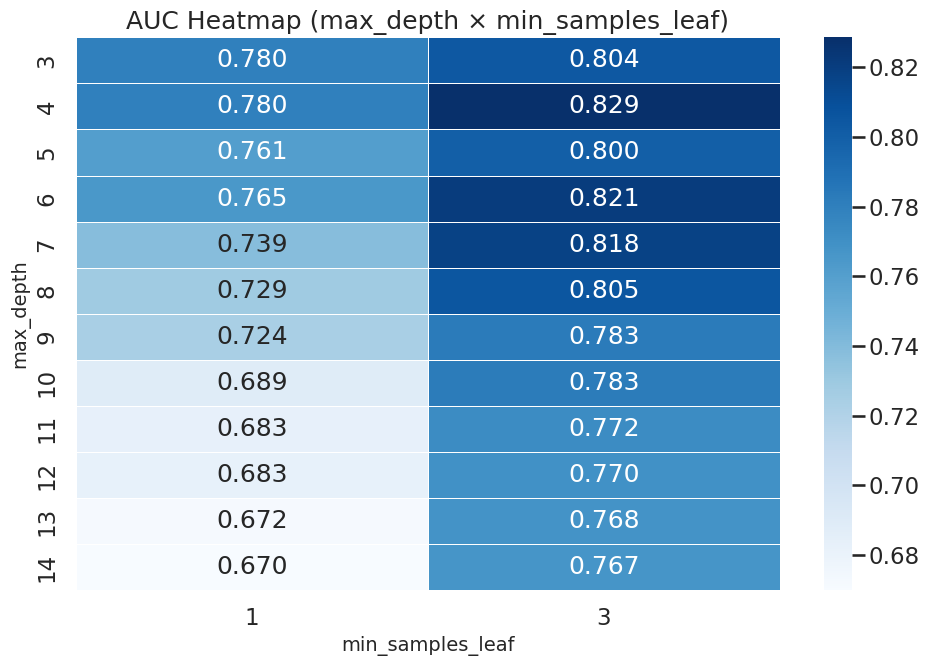


=== Heatmap for F1 Score: max_depth × min_samples_leaf ===


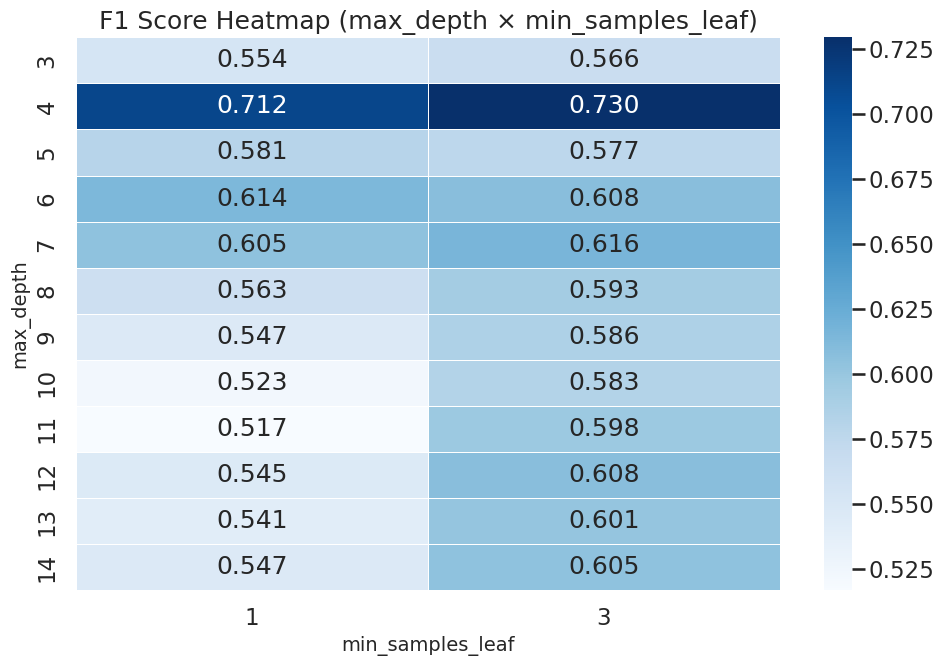


=== Heatmap for Accuracy: max_depth × min_samples_leaf ===


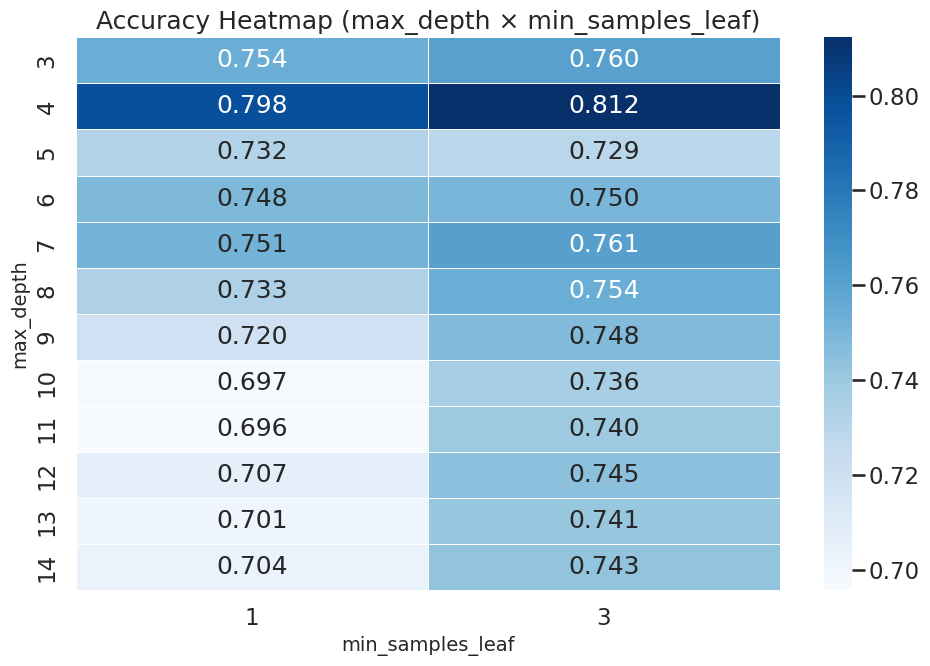

In [ ]:
#성능별 Heatmap(max_depth x min_samples_leaf)
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["AUC", "F1 Score", "Accuracy"]

for metric in metrics:
    print(f"\n=== Heatmap for {metric}: max_depth × min_samples_leaf ===")
    
    # pivot table 생성
    pivot_df = results_dt_df.pivot_table(
        index="max_depth",
        columns="min_samples_leaf",
        values=metric
    )

    plt.figure(figsize=(10, 7))
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt=".3f",
        cmap="Blues",
        linewidths=0.5
    )
    
    plt.title(f"{metric} Heatmap (max_depth × min_samples_leaf)", fontsize=18)
    plt.xlabel("min_samples_leaf", fontsize=14)
    plt.ylabel("max_depth", fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
# Decision Tree 최적 모델 자동 선택
# 기준: AUC 최우선 → F1 → Accuracy

# 1) AUC 기준 BEST 모델 선택
best_auc_row = results_dt_df.loc[results_dt_df["AUC"].idxmax()]

print("=== 최적 Decision Tree 모델 (의료 데이터 기준: AUC 우선) ===")
print(best_auc_row)

best_dataset = best_auc_row["Dataset"]
best_depth = best_auc_row["max_depth"]
best_leaf = best_auc_row["min_samples_leaf"]

print(f"\n 최적 전처리 방법: {best_dataset}")
print(f" 최적 max_depth: {best_depth}")
print(f" 최적 min_samples_leaf: {best_leaf}")
print(f" AUC: {best_auc_row['AUC']:.4f}")
print(f" F1 Score: {best_auc_row['F1 Score']:.4f}")
print(f" Accuracy: {best_auc_row['Accuracy']:.4f}")


=== 최적 Decision Tree 모델 (의료 데이터 기준: AUC 우선) ===
Dataset                dropna
max_depth                   8
min_samples_split           2
min_samples_leaf            3
criterion             entropy
Accuracy             0.835443
F1 Score             0.734694
AUC                  0.891872
Name: 43, dtype: object

 최적 전처리 방법: dropna
 최적 max_depth: 8
 최적 min_samples_leaf: 3
 AUC: 0.8919
 F1 Score: 0.7347
 Accuracy: 0.8354


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# ------------------------------
# 1) dropna 데이터 로딩
# ------------------------------
X_train = pd.read_csv("dropna_train_20251120.csv")
X_test = pd.read_csv("dropna_test_20251120.csv")
y_train = pd.read_csv("dropna_ytrain_20251120.csv").values.ravel()
y_test = pd.read_csv("dropna_ytest_20251120.csv").values.ravel()

# ------------------------------
# 2) 인슐린 변수 제거 (원본 코드 일관성 유지)
# ------------------------------
insulin_col = 'Serum_Insulin(mu_U/ml)'
if insulin_col in X_train.columns:
    X_train = X_train.drop(columns=[insulin_col])
    X_test = X_test.drop(columns=[insulin_col])

# ------------------------------
# 3) 표준화
# ------------------------------
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# ------------------------------
# 4) 검증 세트 분리
# ------------------------------
sub_input, val_input, sub_target, val_target = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

print("검증 세트 크기:", val_input.shape)

# ------------------------------
# 5) Decision Tree (원하는 조합)
# ------------------------------
dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_leaf=3,
    random_state=42
)

dt.fit(sub_input, sub_target)

# ------------------------------
# 6) 성능 계산
# ------------------------------
pred = dt.predict(val_input)
proba = dt.predict_proba(val_input)[:, 1]

acc = accuracy_score(val_target, pred)
f1 = f1_score(val_target, pred)
auc = roc_auc_score(val_target, proba)

# ------------------------------
# 7) 출력
# ------------------------------
print("=== dropna + max_depth=8 + min_leaf=3 성능 ===")
print("Accuracy :", acc)
print("F1 Score :", f1)
print("ROC AUC  :", auc)


검증 세트 크기: (63, 7)
=== dropna + max_depth=8 + min_leaf=3 성능 ===
Accuracy : 0.7619047619047619
F1 Score : 0.5454545454545454
ROC AUC  : 0.7530864197530864
